# Random Forest

Student number:2053460

# Initialisation

## Initialising variables and importing important libraries

If repetetively test is needed then please mount this drive in google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

seed = 42

In this step we have imported the data from a folder in drive and converted into pandas core frame

**Paste the path of the datasheet below**

In [ ]:
dataset = pd.read_csv('/content/gdrive/MyDrive/Intro_to_ai_assesment/coursework1.csv') # path of the datasheet

## Analyzing  given data

At first it is important to get information regarding data in summary so we can have a idea what we are dealing with

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   NOX     15039 non-null  float64
dtypes: float64(10)
memory usage: 1.1 MB


In [ ]:
dataset.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,119.890000


The above table describes attributes like mean, minimum value in a feature.

### Scatter Plot

Scatter plot is an important tool for investigating relation between features and the respective label. It is also important for finding outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


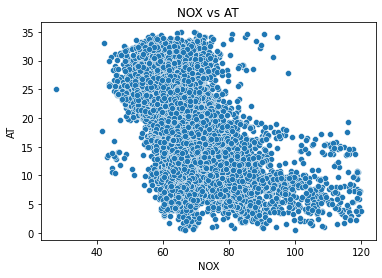

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


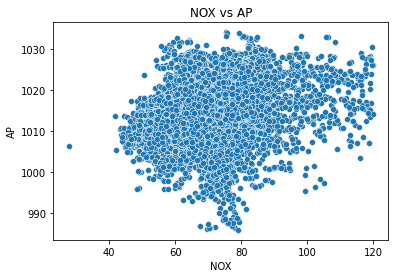

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


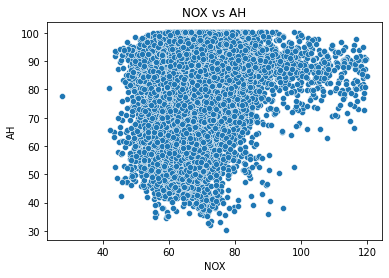

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


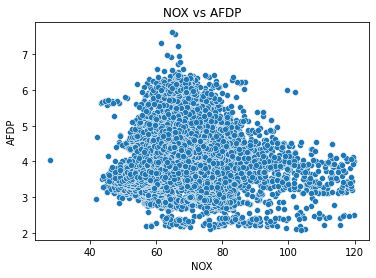

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


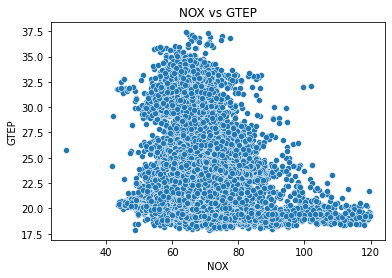

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


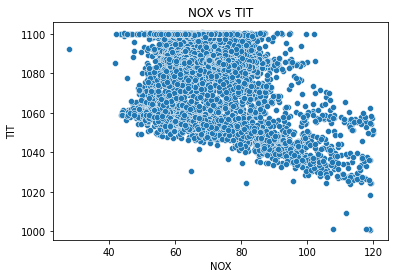

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


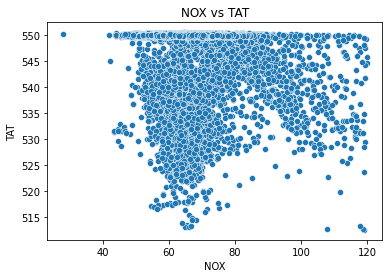

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


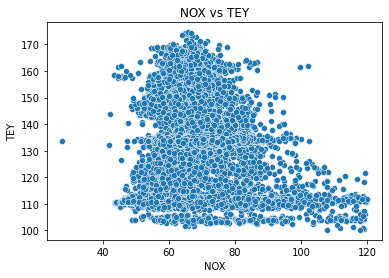

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


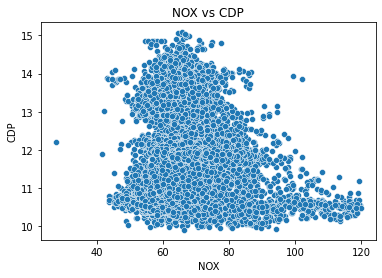

In [ ]:
y_axis=dataset.columns.to_list()
x_axis=dataset['NOX']
for i in range(np.size(y_axis)-1):
  plt.title("NOX vs "+y_axis[i])
  sns.scatterplot(x_axis,dataset[y_axis[i]])
  plt.show()

### Heat Map

Heat map shows the correlation between features and labels and how well a particular feature is affecting the label. Hope " I don't need to drop any feature because it has very less corelation with the label set which can make my model unnecesary biased"

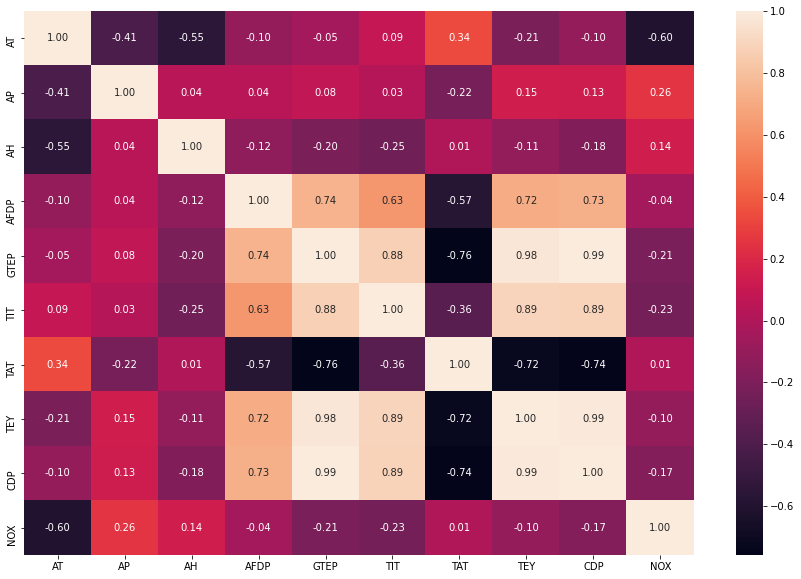

In [ ]:
plt.figure(figsize = (15,10))
correlation = dataset.corr()
sns.heatmap(round(correlation,3),annot=True,fmt='.2f')
plt.show()

After observing the heatmap now i think i have to drop "TAT". But lets confirm this hypothesis by observing scatterplot of the whole datasheet

### Pairplot

In [ ]:
sns.pairplot(dataset, kind='scatter')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

Oops i think i have to drop "TAT" there is less very less corelation. I have to sacrifice TAT for the sake of keeping this model unbiased. I will miss u "TAT" noooooo

## Train Test split

Our journey ends TAT

In [ ]:
x = dataset[['AT', 'AP', 'AH', 'TIT','GTEP', 'TEY', 'CDP', 'AFDP']]         # putting features in x except for TAT
y = dataset.iloc[ : , -1]                                                   # putting labels in y
x.describe()

,AT,AP,AH,TIT,GTEP,TEY,CDP,AFDP
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,1083.798770,25.419061,134.188464,12.102353,4.200294
std,7.574323,6.41076,13.793439,16.527806,4.173916,15.829717,1.103196,0.760197
min,0.522300,985.85000,30.344000,1000.800000,17.878000,100.170000,9.904400,2.087400
25%,11.408000,1008.90000,69.750000,1079.600000,23.294000,127.985000,11.622000,3.723900
50%,18.186000,1012.80000,82.266000,1088.700000,25.082000,133.780000,12.025000,4.186200
75%,23.862500,1016.90000,90.043500,1096.000000,27.184000,140.895000,12.578000,4.550900
max,34.929000,1034.20000,100.200000,1100.800000,37.402000,174.610000,15.081000,7.610600


In this step train test split is created so that model can be a good boy and learn something from its mistake and improve itself during training ("Unlike me").

In [ ]:
from sklearn.model_selection import train_test_split                                            # Creating train test split

x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=seed)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(10527, 8) (4512, 8) (10527,) (4512,)


# Comparing it with Baseline Performance

Meat dummy he is the most dumbest model you can ever create. Sometimes it may perform good ("ONLY SOMETIMES") but most of the time it performs really bad. Dummy is so dumb that if it outperforms the model that i made then!!!!!!!!!

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error

In [ ]:
mean_dummy = DummyRegressor(strategy="mean").fit(x_train, y_train)
median_dummy = DummyRegressor(strategy="median").fit(x_train, y_train)

predict_dummy_mean = mean_dummy.predict(x_test)                                     # dummy mean 
predict_dummy_median = median_dummy.predict(x_test)                                 # dummy median

np.set_printoptions(precision=2)

print(np.concatenate((predict_dummy_mean.reshape(len(predict_dummy_mean),1),predict_dummy_median.reshape(len(predict_dummy_median),1)),1))

[[68.12 66.54]
 [68.12 66.54]
 [68.12 66.54]
 ...
 [68.12 66.54]
 [68.12 66.54]
 [68.12 66.54]]


In [ ]:
print("Mean Squared error: ",mean_squared_error(y_test,predict_dummy_mean))         #M.S.E calculation
print("r2 score(dummy median): ",r2_score(y_test,predict_dummy_median))
print("r2 score(dummy mean): ",r2_score(y_test,predict_dummy_mean))                 # R2 score from median and mean

Mean Squared error:  111.60885162928774
r2 score(dummy median):  -0.02949565966069012
r2 score(dummy mean):  -0.0004980664025597825


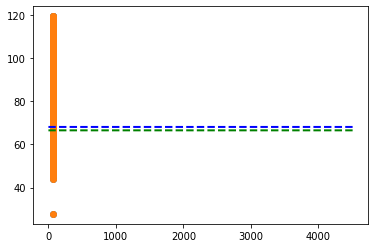

In [ ]:
plt.scatter(predict_dummy_mean, y_test)                                             # Scatter plot for dummy
plt.scatter(predict_dummy_median, y_test)
plt.plot(predict_dummy_mean, color = "blue", linestyle = "dashed", linewidth = 2, label = "mean dummy")
plt.plot(predict_dummy_median, color = "green", linestyle = "dashed", linewidth = 2, label = "median dummy")
plt.show()

# Random Forest

Hear comes Random forest the best of the best (I hope so) 

In [ ]:
from sklearn.ensemble import RandomForestRegressor                        # import randomforestregresor
random_model = RandomForestRegressor()

random_model.fit(x_train, y_train)                                        # fit the model
print("The parameter in use:")
print(random_model.get_params())

The parameter in use:
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In these step we will see how nicely it has performed

In [ ]:
predicted_value = random_model.predict(x_test)
error = np.mean(abs(predicted_value- y_test)/y_test)                # error
accuracy = 1 - error
accuracy_percent = 100*accuracy                                     # accuracy

print("error is:",error*100)
print("accuracy:",accuracy_percent)

error is: 3.2711664485080947
accuracy: 96.72883355149192


It performed good with **3.25% of error**. "TAT" your sacrifice didn't got wasted

In this step we will see how well random forest performed in terms of metrics that we chose

In [ ]:
mse = np.square(np.subtract(y_test,predicted_value)).mean()
print("mean square error :",mse)
print("r2 score for this model is :",r2_score(y_test,predicted_value))

mean square error : 12.059130523576393
r2 score for this model is : 0.8918980296347013


Ahh good **mse=12.04 and r2_score=0.89** not bad

# Random forest Regressor (very regressive)

If something is good it does not mean it can not be better ( Black Panther ). Also i don't know if the parameters i chose was best for my model. So, i will run a RandomizedsearchCV which definately will increase my time complexity but the training will be done in accordance with best hyperparameters. I have chosen some values that i think will be best for my model and this class will try different iterations of this to find best match for my algorithm

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

estimators = [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]

max_feature = ["auto", "sqrt"]

max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None]

min_sample_split = [2,5,10]

min_sample_leaf = [1,2,4]

bootstrap = [True, False]

random_grid = {"n_estimators" : estimators,
              "max_features" : max_feature,
              "max_depth" : max_depth,
              "min_samples_split" : min_sample_split,
              "min_samples_leaf" : min_sample_leaf,
              "bootstrap" : bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


**There is no turning back after you press this button this will take 4hrs** I will just go and watch Snyder Cut in the mean time

In [ ]:
#Note
#This tab will take long time to run and results are already below

regressor = RandomForestRegressor()

regressor_random = RandomizedSearchCV(estimator=regressor, param_distributions=random_grid, n_iter=50, cv=3, verbose=2, random_state=seed, n_jobs= -1)

regressor_random.fit(x_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 16.9min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 63.8min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

Lets see how my model performed

In [ ]:
random_regressor = regressor_random.best_estimator_
random_predict = random_regressor.predict(x_test)
random_error = abs(random_predict - y_test)
random_accuracy = 100-100 * np.mean(error / y_test) 

print("The Model Performance is : ")
print("Average Error : ",np.mean(error))
print("Accuracy : ",random_accuracy)

The Model Performance is : 
Average Error :  0.03271166448508095
Accuracy :  99.9510883344977


My MODEL u came to 99% accuracy from 96% i am so proud of you

In [ ]:
mse_n = np.square(np.subtract(y_test,random_predict)).mean()
print("mean square error :",mse)
print("r2 score for this model is :",r2_score(y_test,random_predict))

mean square error : 12.059130523576393
r2 score for this model is : 0.8958563393566992


## Visualising the results

Histogram plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


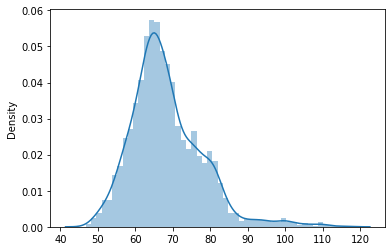

In [143]:
sns.distplot(random_predict)
plt.show()

Scatter plot

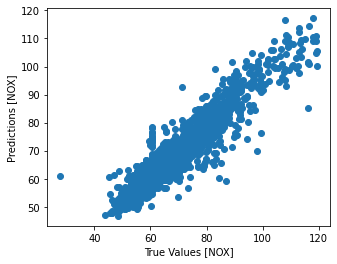

It looks nice except for some outliers